In [4]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# 讀取資料
df1 = pd.read_csv('L7_Train.csv')
df2 = pd.read_csv('L7_Train_2.csv')
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)

Shape of df1: (43518, 8)
Shape of df2: (11237, 8)


In [ ]:
# 合併處理
df = pd.concat([df1, df2], ignore_index=True)
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,7,2024-05-17 16:54:50.000,0.00,1006.37,27.06,61.03,3382.50,2.00
1,7,2024-05-17 16:55:48.000,4.09,1006.39,27.20,60.55,3457.50,2.03
2,7,2024-05-17 16:56:48.000,3.66,1006.37,27.28,60.36,3247.50,1.77
3,7,2024-05-17 16:57:48.000,0.00,1006.40,27.33,60.17,3678.33,2.31
4,7,2024-05-17 16:58:48.000,0.00,1006.37,27.35,60.08,3598.33,2.13
...,...,...,...,...,...,...,...,...
54750,7,2024-10-22 17:23:59.000,0.00,1008.20,26.49,100.00,73.33,0.00
54751,7,2024-10-22 17:24:59.000,0.00,1008.21,26.47,100.00,67.50,0.00
54752,7,2024-10-22 17:25:59.000,0.00,1008.23,26.47,100.00,59.17,0.00
54753,7,2024-10-22 17:26:59.000,0.00,1008.32,26.45,100.00,48.33,0.00


In [8]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,54755.0,54755.000000,54755.000000,54755.000000,54755.000000,54755.000000,54755.000000
mean,7.0,0.007163,1004.031342,36.591645,57.635271,39917.485755,455.317348
std,0.0,0.167507,3.292781,9.123947,29.051456,39470.398875,610.741153
min,7.0,0.000000,993.900000,19.900000,11.690000,20.000000,0.000000
25%,7.0,0.000000,1002.000000,28.670000,30.780000,5764.165000,5.500000
50%,7.0,0.000000,1003.900000,35.330000,53.960000,25060.000000,109.250000
75%,7.0,0.000000,1005.910000,44.110000,87.175000,66508.630000,770.540000
max,7.0,8.620000,1015.220000,56.960000,100.000000,117758.200000,2543.780000


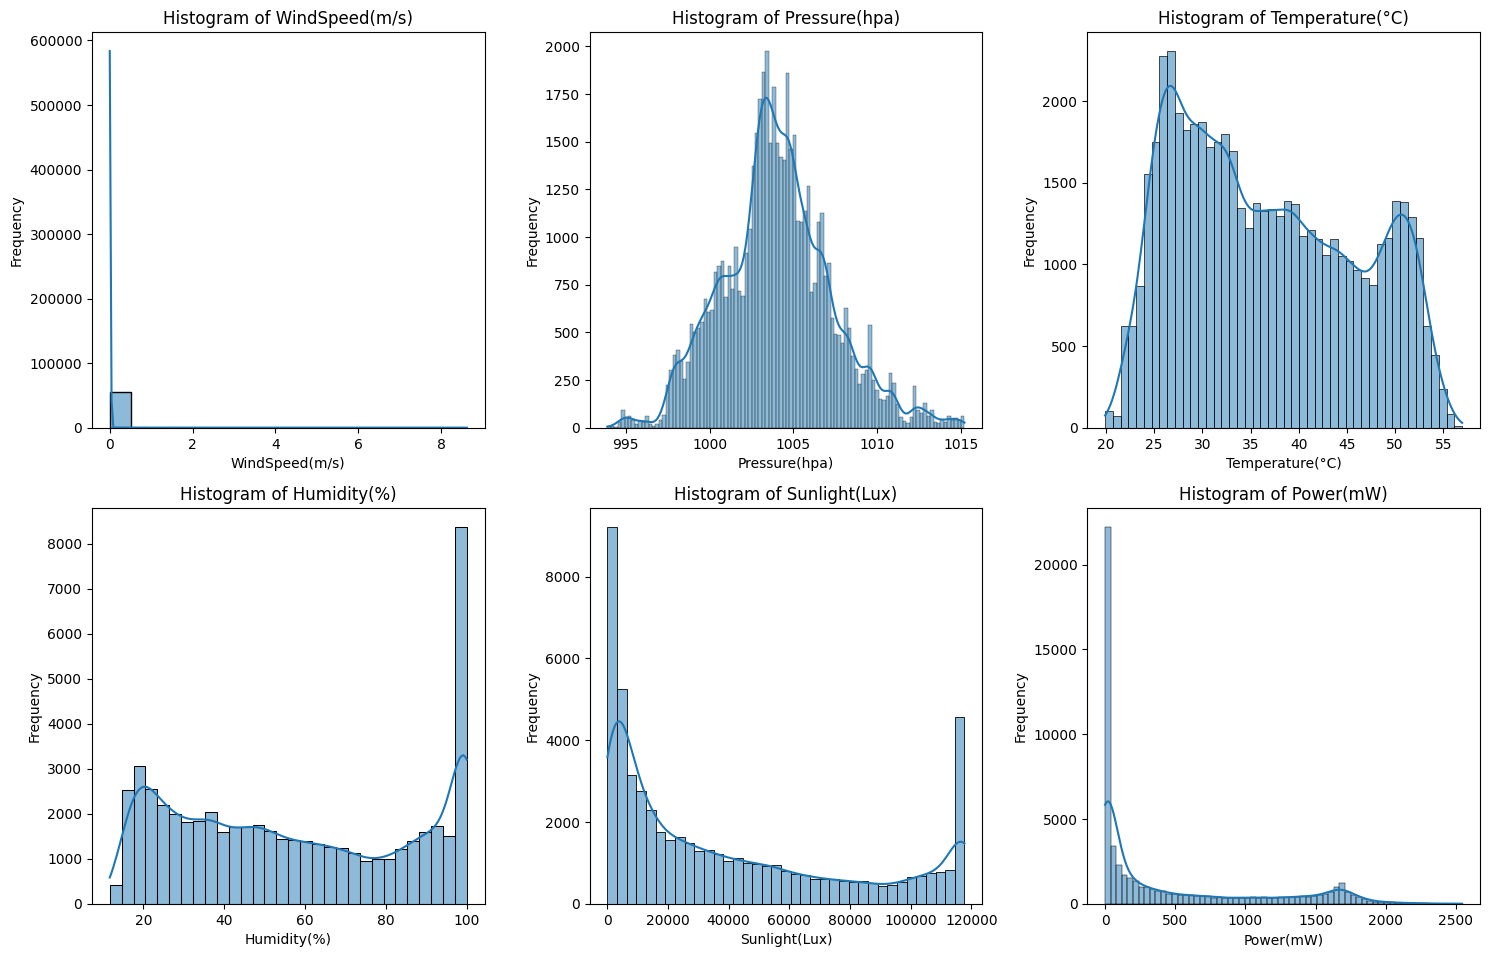

In [ ]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [11]:
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
367,7,2024-05-18 09:14:49.000,0.0,1006.40,34.19,41.59,117758.2,2178.21
388,7,2024-05-18 09:35:49.000,0.0,1006.43,40.20,28.40,117758.2,2182.80
389,7,2024-05-18 09:36:49.000,0.0,1006.42,40.58,27.53,117758.2,2385.70
395,7,2024-05-18 09:42:49.000,0.0,1006.37,42.16,23.90,117758.2,1916.77
415,7,2024-05-18 10:02:49.000,0.0,1006.20,42.85,22.78,117758.2,2025.04
...,...,...,...,...,...,...,...,...
54409,7,2024-10-22 11:42:59.000,0.0,1008.90,36.98,67.60,117758.2,1993.97
54426,7,2024-10-22 11:59:59.000,0.0,1008.60,35.79,72.82,117758.2,2242.35
54427,7,2024-10-22 12:00:59.000,0.0,1008.62,36.67,70.34,117758.2,2067.93
54443,7,2024-10-22 12:16:59.000,0.0,1008.33,34.19,81.28,117758.2,2231.99


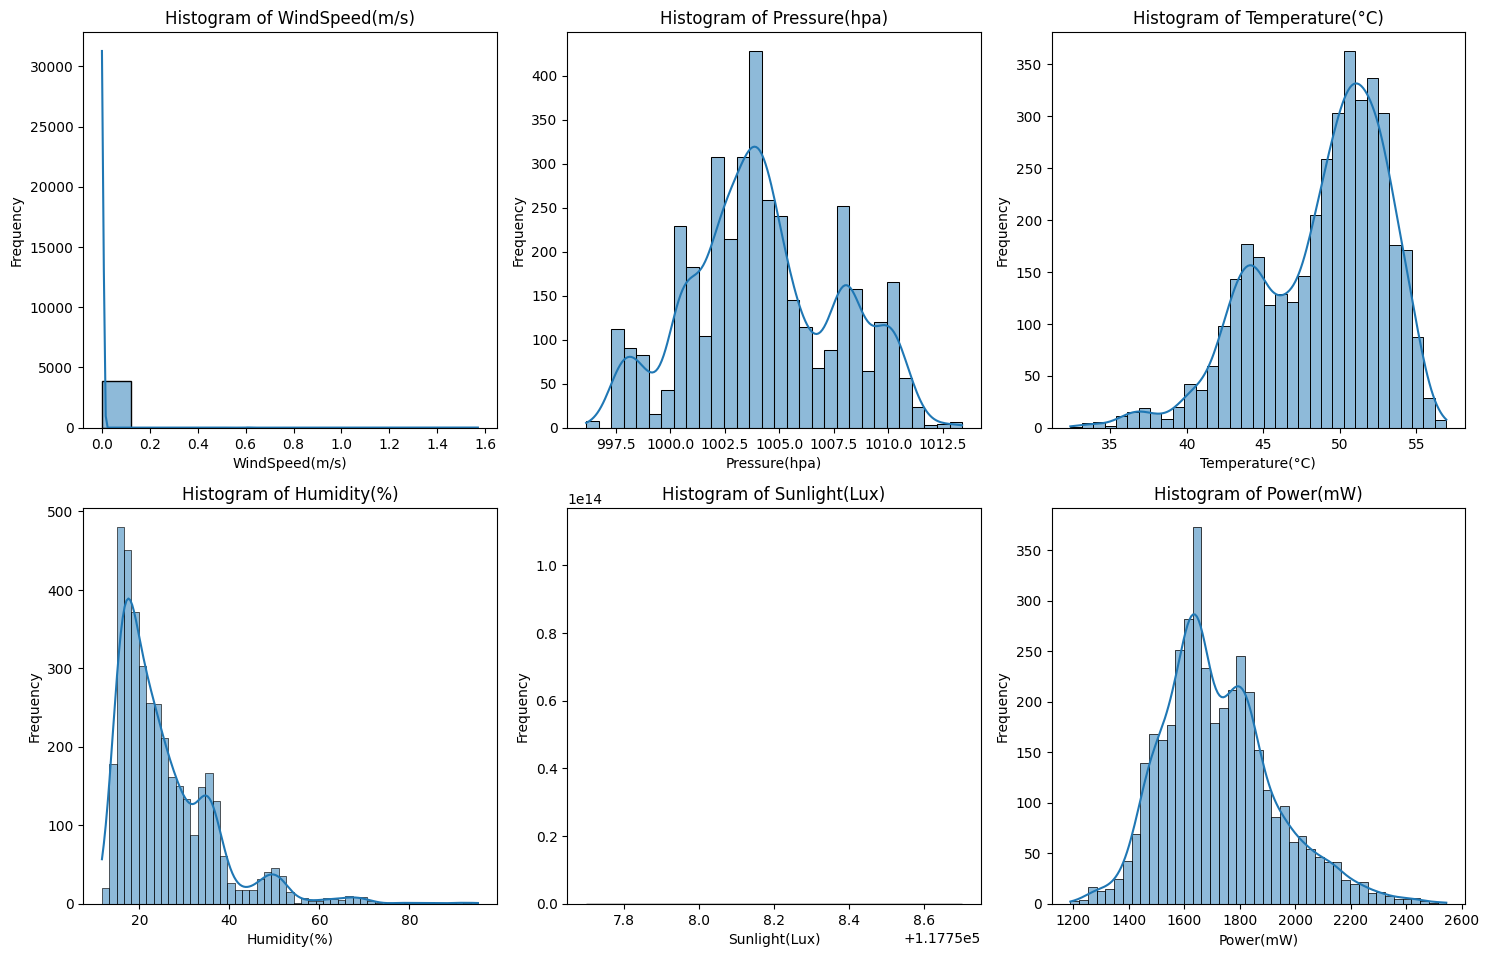

In [ ]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [13]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0144 * Sunlight(Lux) + -132.2070


In [14]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.0144
intercept = -132.2070

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [15]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,54755.0,54755.000000,54755.000000,54755.000000,54755.000000,54755.000000,54755.000000
mean,7.0,0.007163,1004.031342,36.591645,57.635271,40699.635331,455.317348
std,0.0,0.167507,3.292781,9.123947,29.051456,41252.173676,610.741153
min,7.0,0.000000,993.900000,19.900000,11.690000,20.000000,0.000000
25%,7.0,0.000000,1002.000000,28.670000,30.780000,5764.165000,5.500000
50%,7.0,0.000000,1003.900000,35.330000,53.960000,25060.000000,109.250000
75%,7.0,0.000000,1005.910000,44.110000,87.175000,66508.630000,770.540000
max,7.0,8.620000,1015.220000,56.960000,100.000000,185832.430556,2543.780000


In [16]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [17]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240517165407,1.44,1006.39,27.29,60.31,3413.67,1.98
1,20240517170407,0.00,1006.50,27.23,60.55,2995.83,1.53
2,20240517171407,0.00,1006.59,26.94,62.53,2122.17,0.80
3,20240517172407,0.32,1006.59,25.82,74.25,1849.67,0.69
4,20240517173407,0.69,1006.59,24.40,85.15,3281.83,2.40
...,...,...,...,...,...,...,...
5471,20241022164307,0.00,1008.15,27.06,100.00,1334.42,0.36
5472,20241022165307,0.00,1008.31,26.76,100.00,452.58,0.06
5473,20241022170307,0.00,1008.33,26.57,100.00,255.75,0.02
5474,20241022171307,0.00,1008.23,26.51,100.00,126.83,0.01


# HEATMAP

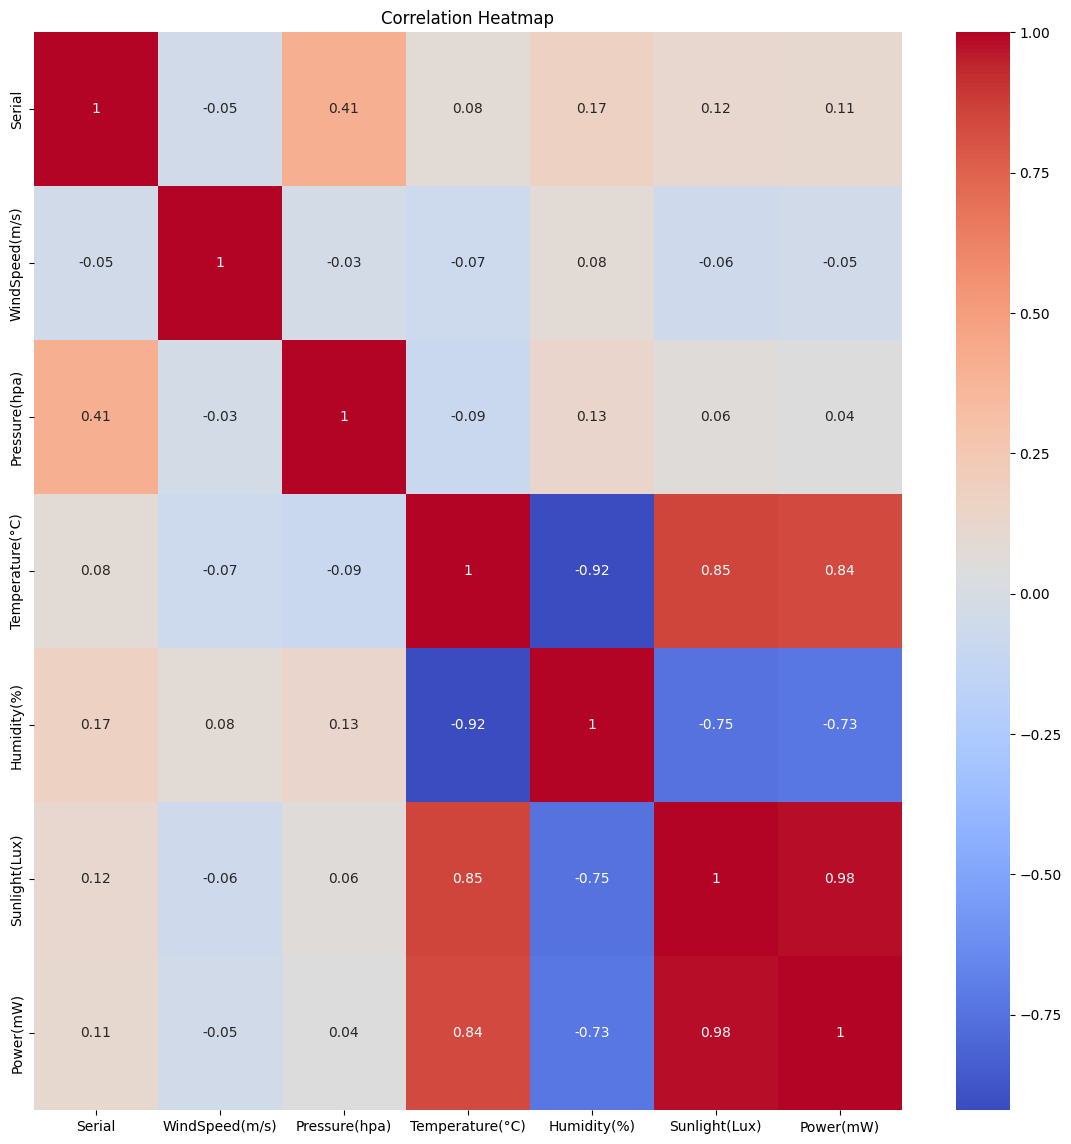

In [ ]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.977114
Temperature(°C)    0.843694
Humidity(%)        0.732317
Serial             0.111674
WindSpeed(m/s)     0.047310
Pressure(hpa)      0.044487
Name: Power(mW), dtype: float64

In [20]:
df.to_csv('L7_Train_Revise.csv', index=False)